In [67]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [68]:
# importing sub 1 pan right data
# sub_1_1_pan_right_DF = pd.read_csv("../Data/Sub1/Instructional/session_I_PanRight_subjID_1_04-14-23_02-30-22.csv")
sub_1_1_pan_right_DF = pd.read_csv("../Data/Sub4/Instructional/session_I_ZoomIn_subjID_4_04-28-23_03-37-04.csv")
sub_1_1_pan_right_DF.head()

,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
0,64.976067,15:37:4:941,0,0,0.0,0.0,0,False,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64.995132,15:37:4:960,0,0,0.0,0.0,0,False,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65.015572,15:37:4:980,0,0,0.0,0.0,0,False,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65.035637,15:37:5:0,0,0,0.0,0.0,0,False,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65.038498,15:37:5:3,0,0,0.0,0.0,0,False,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
sub_1_1_pan_right_DF.drop(sub_1_1_pan_right_DF[(sub_1_1_pan_right_DF['trigger_pull_amount_left'] == 0) & (sub_1_1_pan_right_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_1_1_pan_right_DF.head()

,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
281,68.911880,15:37:8:877,1,0,0.336,0.000,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,68.925919,15:37:8:891,1,0,0.336,0.000,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,68.939972,15:37:8:905,1,0,0.506,0.000,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,68.953903,15:37:8:919,1,1,1.000,0.193,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,68.967613,15:37:8:933,1,1,1.000,0.193,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
sub_1_1_pan_right_DF.shape

(312, 48)

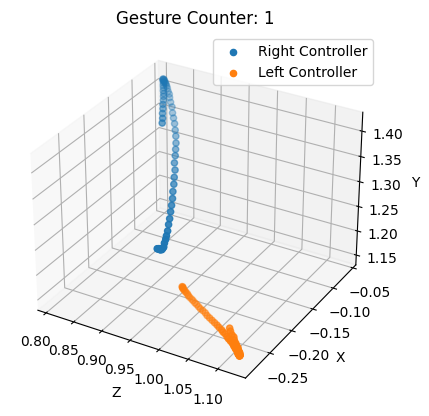

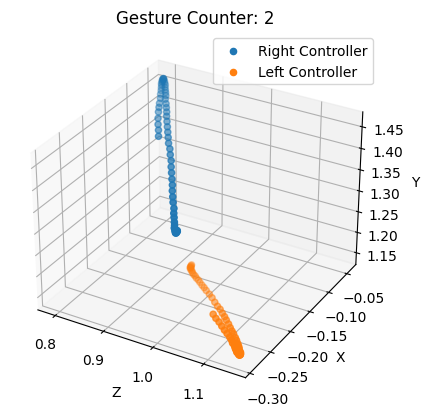

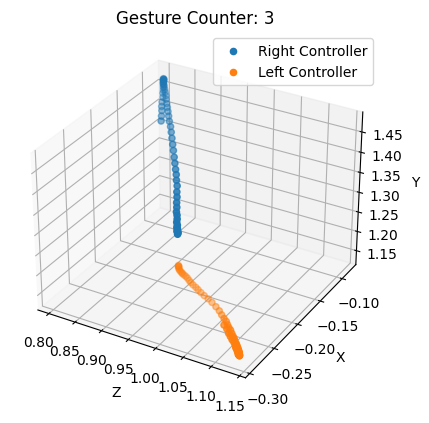

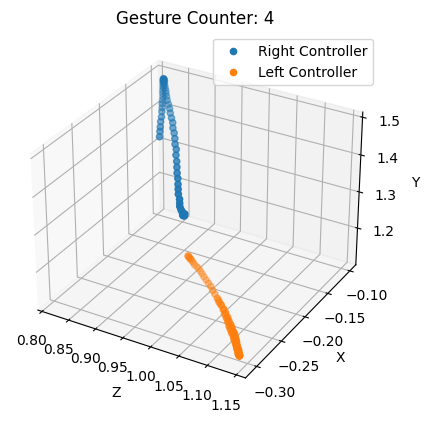

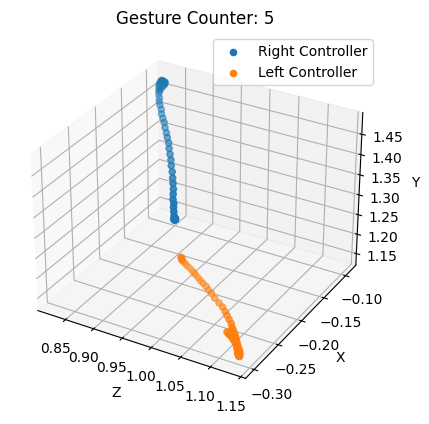

In [71]:
grouped_by_gesture = sub_1_1_pan_right_DF.groupby('gesture_counter')
print(grouped_by_gesture)

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    # ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')

    # ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_z'], group['r_controller_translation_y'], label='Right Controller')
    # ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_z'], group['l_controller_translation_y'], label='Left Controller')

    ax.scatter(group['r_controller_translation_z'], group['r_controller_translation_x'], group['r_controller_translation_y'], label='Right Controller')
    ax.scatter(group['l_controller_translation_z'], group['l_controller_translation_x'], group['l_controller_translation_y'], label='Left Controller')

    ax.set_xlabel('Z')
    ax.set_ylabel('X')
    ax.set_zlabel('Y')
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()

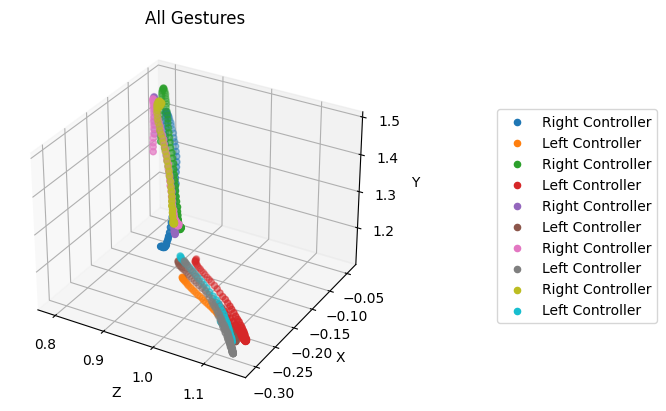

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_gesture = sub_1_1_pan_right_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    # ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Gesture {gesture_counter} - Right Controller')
    # ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Gesture {gesture_counter} - Left Controller')

    # ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_z'], group['r_controller_translation_y'], label='Right Controller')
    # ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_z'], group['l_controller_translation_y'], label='Left Controller')

    ax.scatter(group['r_controller_translation_z'], group['r_controller_translation_x'], group['r_controller_translation_y'], label='Right Controller')
    ax.scatter(group['l_controller_translation_z'], group['l_controller_translation_x'], group['l_controller_translation_y'], label='Left Controller')

    # ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Gesture {gesture_counter} - Right Controller')
    # ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Gesture {gesture_counter} - Left Controller')

ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.set_title('All Gestures')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [73]:
# only counter variables in dataframe
counter = ["time", "absolute_time", "left_handed", "right_handed", "trigger_pull_amount_left", "trigger_pull_amount_right", "gesture_counter_UI", "x_pressed", "x_counter", "gesture_counter"]
sub_1_1_pan_right_DF_counter = sub_1_1_pan_right_DF[counter]
sub_1_1_pan_right_DF_counter.head()

,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
281,68.911880,15:37:8:877,1,0,0.336,0.000,1,False,0,1
282,68.925919,15:37:8:891,1,0,0.336,0.000,1,False,0,1
283,68.939972,15:37:8:905,1,0,0.506,0.000,1,False,0,1
284,68.953903,15:37:8:919,1,1,1.000,0.193,1,False,0,1
285,68.967613,15:37:8:933,1,1,1.000,0.193,1,False,0,1


In [74]:
sub_1_1_pan_right_DF_counter.shape

(312, 10)

In [75]:
# only translation variables in dataframe
translation = ["r_controller_translation_x", "r_controller_translation_y", "r_controller_translation_z", "l_controller_translation_x", "l_controller_translation_y", "l_controller_translation_z"]
sub_1_1_pan_right_DF_translation = sub_1_1_pan_right_DF[translation]
sub_1_1_pan_right_DF_translation.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
281,-0.218,1.232,0.927,-0.248,1.205,0.995
282,-0.218,1.232,0.928,-0.248,1.205,0.995
283,-0.217,1.232,0.929,-0.248,1.205,0.996
284,-0.217,1.232,0.930,-0.249,1.205,0.996
285,-0.217,1.232,0.931,-0.249,1.205,0.997


In [76]:
zscore = StandardScaler()
sub_z_1_1_pan_right_DF = pd.DataFrame(zscore.fit_transform(sub_1_1_pan_right_DF_translation))
sub_z_1_1_pan_right_DF.head()

,0,1,2,3,4,5
0,-1.596472,-2.236923,1.115102,1.591762,0.465701,-1.722997
1,-1.596472,-2.236923,1.133549,1.591762,0.465701,-1.722997
2,-1.577825,-2.236923,1.151996,1.591762,0.465701,-1.703219
3,-1.577825,-2.236923,1.170443,1.532639,0.465701,-1.703219
4,-1.577825,-2.236923,1.188890,1.532639,0.465701,-1.683440


In [77]:
sub_z_1_1_pan_right_DF.columns = ['r_controller_translation_x', 'r_controller_translation_y', 'r_controller_translation_z', 'l_controller_translation_x', 'l_controller_translation_y', 'l_controller_translation_z']
sub_z_1_1_pan_right_DF.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,-1.596472,-2.236923,1.115102,1.591762,0.465701,-1.722997
1,-1.596472,-2.236923,1.133549,1.591762,0.465701,-1.722997
2,-1.577825,-2.236923,1.151996,1.591762,0.465701,-1.703219
3,-1.577825,-2.236923,1.170443,1.532639,0.465701,-1.703219
4,-1.577825,-2.236923,1.188890,1.532639,0.465701,-1.683440


In [78]:
sub_z_1_1_pan_right_DF.shape

(312, 6)

In [79]:
sub_1_1_pan_right_DF_counter.insert(0, 'index', range(0, 0 + len(sub_1_1_pan_right_DF)))
sub_1_1_pan_right_DF_counter.head()

,index,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
281,0,68.911880,15:37:8:877,1,0,0.336,0.000,1,False,0,1
282,1,68.925919,15:37:8:891,1,0,0.336,0.000,1,False,0,1
283,2,68.939972,15:37:8:905,1,0,0.506,0.000,1,False,0,1
284,3,68.953903,15:37:8:919,1,1,1.000,0.193,1,False,0,1
285,4,68.967613,15:37:8:933,1,1,1.000,0.193,1,False,0,1


In [80]:
sub_z_1_1_pan_right_DF.insert(0, 'index', range(0, 0 + len(sub_z_1_1_pan_right_DF)))
sub_z_1_1_pan_right_DF.head()

,index,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,-1.596472,-2.236923,1.115102,1.591762,0.465701,-1.722997
1,1,-1.596472,-2.236923,1.133549,1.591762,0.465701,-1.722997
2,2,-1.577825,-2.236923,1.151996,1.591762,0.465701,-1.703219
3,3,-1.577825,-2.236923,1.170443,1.532639,0.465701,-1.703219
4,4,-1.577825,-2.236923,1.188890,1.532639,0.465701,-1.683440


In [81]:
merged_sub_z_1_1_pan_right_DF = pd.merge(left=sub_1_1_pan_right_DF_counter, right=sub_z_1_1_pan_right_DF, left_on='index', right_on='index')
merged_sub_z_1_1_pan_right_DF.head()

,index,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,68.911880,15:37:8:877,1,0,0.336,0.000,1,False,0,1,-1.596472,-2.236923,1.115102,1.591762,0.465701,-1.722997
1,1,68.925919,15:37:8:891,1,0,0.336,0.000,1,False,0,1,-1.596472,-2.236923,1.133549,1.591762,0.465701,-1.722997
2,2,68.939972,15:37:8:905,1,0,0.506,0.000,1,False,0,1,-1.577825,-2.236923,1.151996,1.591762,0.465701,-1.703219
3,3,68.953903,15:37:8:919,1,1,1.000,0.193,1,False,0,1,-1.577825,-2.236923,1.170443,1.532639,0.465701,-1.703219
4,4,68.967613,15:37:8:933,1,1,1.000,0.193,1,False,0,1,-1.577825,-2.236923,1.188890,1.532639,0.465701,-1.683440


In [82]:
merged_sub_z_1_1_pan_right_DF.shape

(312, 17)

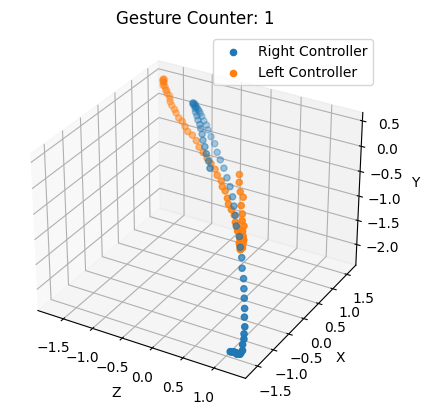

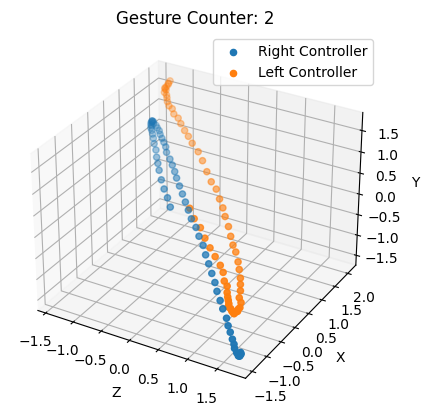

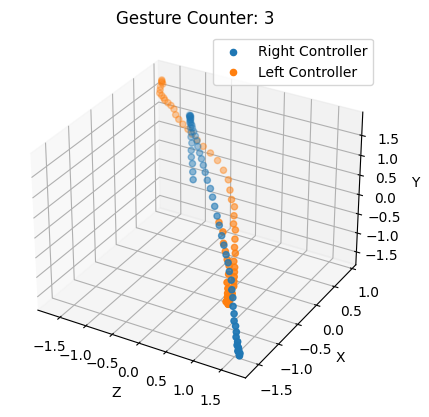

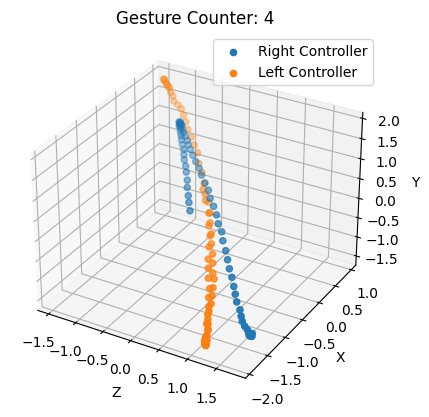

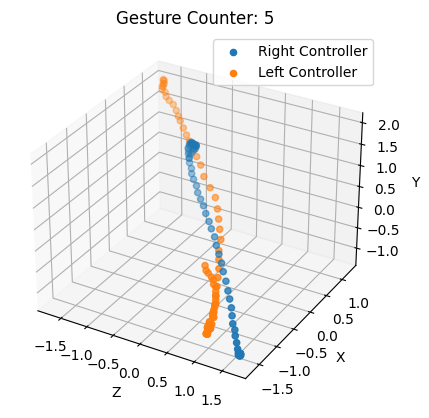

In [83]:
grouped_by_gesture = merged_sub_z_1_1_pan_right_DF.groupby('gesture_counter')
print(grouped_by_gesture)

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    # ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    ax.scatter(group['r_controller_translation_z'], group['r_controller_translation_x'], group['r_controller_translation_y'], label='Right Controller')
    ax.scatter(group['l_controller_translation_z'], group['l_controller_translation_x'], group['l_controller_translation_y'], label='Left Controller')

    ax.set_xlabel('Z')
    ax.set_ylabel('X')
    ax.set_zlabel('Y')
    
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()

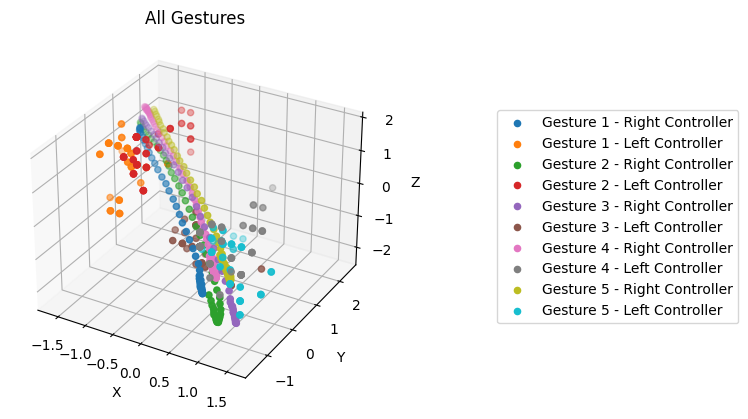

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_gesture = merged_sub_z_1_1_pan_right_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Gesture {gesture_counter} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Gesture {gesture_counter} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('All Gestures')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [18]:
# only translation variables in dataframe
translation_right = ["r_controller_translation_x", "r_controller_translation_y", "r_controller_translation_z"]
sub_1_1_pan_right_DF_translation_right = sub_1_1_pan_right_DF[translation_right]
sub_1_1_pan_right_DF_translation_right.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z
173,-0.325,1.200,0.029
174,-0.325,1.199,0.029
175,-0.324,1.198,0.029
176,-0.324,1.197,0.029
177,-0.324,1.196,0.029


In [19]:
zscore_r = StandardScaler()
sub_z_1_1_pan_right_r_DF = pd.DataFrame(zscore_r.fit_transform(sub_1_1_pan_right_DF_translation_right))
sub_z_1_1_pan_right_r_DF.head()

,0,1,2
0,-1.468405,1.176753,1.194111
1,-1.468405,1.164867,1.194111
2,-1.450604,1.152981,1.194111
3,-1.450604,1.141095,1.194111
4,-1.450604,1.129209,1.194111


In [20]:
sub_z_1_1_pan_right_r_DF.columns = ['r_controller_translation_x', 'r_controller_translation_y', 'r_controller_translation_z']
sub_z_1_1_pan_right_r_DF.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z
0,-1.468405,1.176753,1.194111
1,-1.468405,1.164867,1.194111
2,-1.450604,1.152981,1.194111
3,-1.450604,1.141095,1.194111
4,-1.450604,1.129209,1.194111


In [245]:
sub_z_1_1_pan_right_r_DF.shape

(223, 3)

In [21]:
sub_z_1_1_pan_right_r_DF.insert(0, 'index', range(0, 0 + len(sub_z_1_1_pan_right_r_DF)))
sub_z_1_1_pan_right_r_DF.head()

,index,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z
0,0,-1.468405,1.176753,1.194111
1,1,-1.468405,1.164867,1.194111
2,2,-1.450604,1.152981,1.194111
3,3,-1.450604,1.141095,1.194111
4,4,-1.450604,1.129209,1.194111


In [22]:
sub_z_1_1_pan_right_r_DF.shape

(258, 4)

In [23]:
# only translation variables in dataframe
translation_left = ["l_controller_translation_x", "l_controller_translation_y", "l_controller_translation_z"]
sub_1_1_pan_right_DF_translation_left = sub_1_1_pan_right_DF[translation_left]
sub_1_1_pan_right_DF_translation_left.head()

,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
173,-0.424,1.18,0.067
174,-0.424,1.18,0.066
175,-0.424,1.18,0.066
176,-0.424,1.18,0.066
177,-0.424,1.18,0.066


In [24]:
zscore_l = StandardScaler()
sub_z_1_1_pan_right_l_DF = pd.DataFrame(zscore_l.fit_transform(sub_1_1_pan_right_DF_translation_left))
sub_z_1_1_pan_right_l_DF.head()

,0,1,2
0,-1.472983,0.04015,-0.208745
1,-1.472983,0.04015,-0.619860
2,-1.472983,0.04015,-0.619860
3,-1.472983,0.04015,-0.619860
4,-1.472983,0.04015,-0.619860


In [25]:
sub_z_1_1_pan_right_l_DF.columns = ['l_controller_translation_x', 'l_controller_translation_y', 'l_controller_translation_z']
sub_z_1_1_pan_right_l_DF.head()

,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,-1.472983,0.04015,-0.208745
1,-1.472983,0.04015,-0.619860
2,-1.472983,0.04015,-0.619860
3,-1.472983,0.04015,-0.619860
4,-1.472983,0.04015,-0.619860


In [26]:
sub_z_1_1_pan_right_l_DF.shape

(258, 3)

In [27]:
sub_z_1_1_pan_right_l_DF.insert(0, 'index', range(0, 0 + len(sub_1_1_pan_right_DF)))
sub_z_1_1_pan_right_l_DF.head()

,index,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,-1.472983,0.04015,-0.208745
1,1,-1.472983,0.04015,-0.619860
2,2,-1.472983,0.04015,-0.619860
3,3,-1.472983,0.04015,-0.619860
4,4,-1.472983,0.04015,-0.619860


In [28]:
sub_z_1_1_pan_right_l_DF.shape

(258, 4)

In [29]:
merged_sub_z_1_1_pan_right_r_DF = pd.merge(left=sub_1_1_pan_right_DF_counter, right=sub_z_1_1_pan_right_r_DF, left_on='index', right_on='index')
merged_sub_z_1_1_pan_right_r_DF.head()

,index,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z
0,0,113.924225,15:56:35:982,0,1,0,0.238,1,False,0,1,-1.468405,1.176753,1.194111
1,1,113.938019,15:56:35:996,0,1,0,0.583,1,False,0,1,-1.468405,1.164867,1.194111
2,2,113.951836,15:56:36:10,0,1,0,0.882,1,False,0,1,-1.450604,1.152981,1.194111
3,3,113.965874,15:56:36:24,0,1,0,1.000,1,False,0,1,-1.450604,1.141095,1.194111
4,4,113.979774,15:56:36:37,0,1,0,1.000,1,False,0,1,-1.450604,1.129209,1.194111


In [30]:
merged_sub_z_1_1_pan_right_r_DF.shape

(258, 14)

In [31]:
merged_sub_z_1_1_pan_right_r_l_DF = pd.merge(left=merged_sub_z_1_1_pan_right_r_DF, right=sub_z_1_1_pan_right_l_DF, left_on='index', right_on='index')
merged_sub_z_1_1_pan_right_r_l_DF.head()

,index,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,113.924225,15:56:35:982,0,1,0,0.238,1,False,0,1,-1.468405,1.176753,1.194111,-1.472983,0.04015,-0.208745
1,1,113.938019,15:56:35:996,0,1,0,0.583,1,False,0,1,-1.468405,1.164867,1.194111,-1.472983,0.04015,-0.619860
2,2,113.951836,15:56:36:10,0,1,0,0.882,1,False,0,1,-1.450604,1.152981,1.194111,-1.472983,0.04015,-0.619860
3,3,113.965874,15:56:36:24,0,1,0,1.000,1,False,0,1,-1.450604,1.141095,1.194111,-1.472983,0.04015,-0.619860
4,4,113.979774,15:56:36:37,0,1,0,1.000,1,False,0,1,-1.450604,1.129209,1.194111,-1.472983,0.04015,-0.619860


In [32]:
merged_sub_z_1_1_pan_right_r_l_DF.shape

(258, 17)

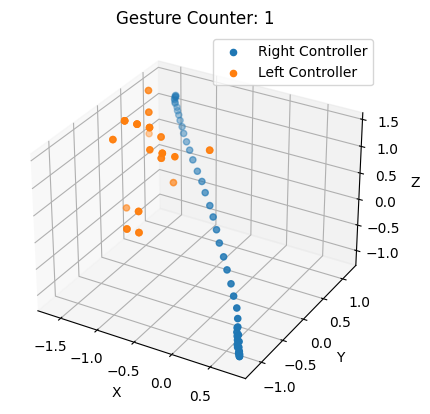

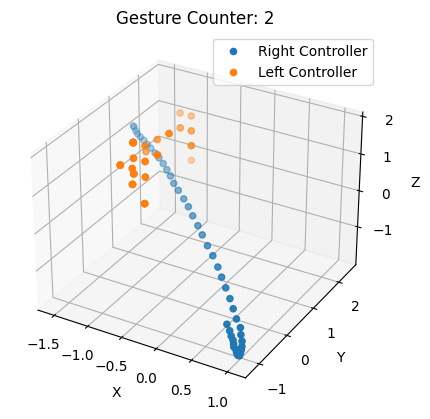

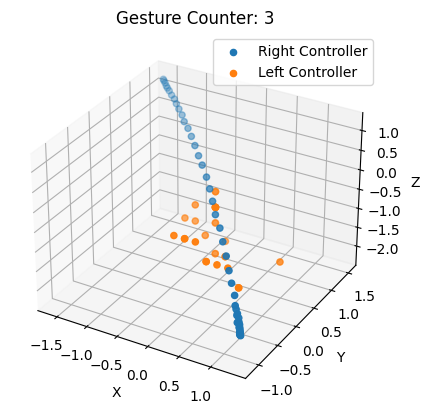

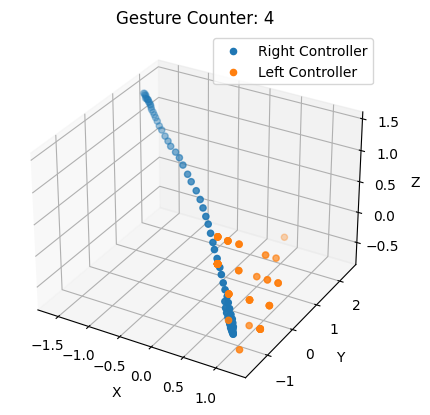

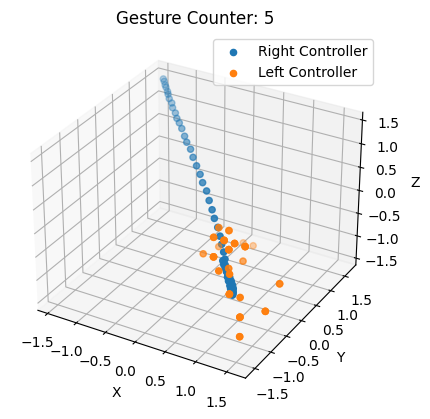

In [33]:
grouped_by_gesture = merged_sub_z_1_1_pan_right_r_l_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()

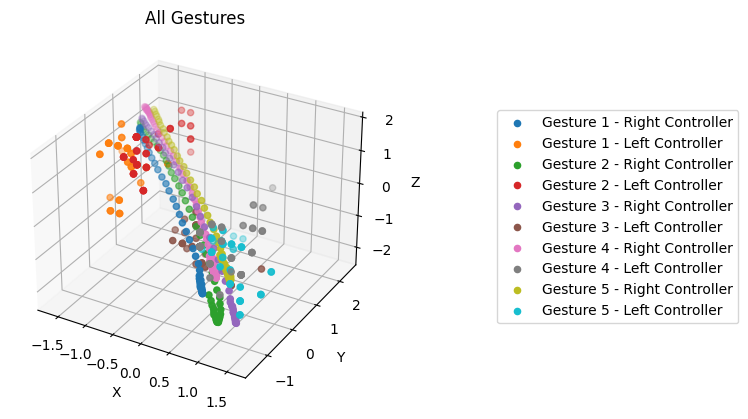

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_gesture = merged_sub_z_1_1_pan_right_r_l_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Gesture {gesture_counter} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Gesture {gesture_counter} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('All Gestures')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [35]:
# importing sub 1 pan left data
sub_1_1_pan_left_DF = pd.read_csv("../Data/Sub1/Instructional/session_I_PanLeft_subjID_1_04-14-23_02-30-41.csv")
sub_1_1_pan_left_DF.head()

,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
0,77.990524,14:30:41:32,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78.010376,14:30:41:52,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78.030640,14:30:41:73,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78.047913,14:30:41:90,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78.050377,14:30:41:92,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
sub_1_1_pan_left_DF.drop(sub_1_1_pan_left_DF[(sub_1_1_pan_left_DF['trigger_pull_amount_left'] == 0) & (sub_1_1_pan_left_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_1_1_pan_right_DF.head()

,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
173,113.924225,15:56:35:982,0,1,0,0.238,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,113.938019,15:56:35:996,0,1,0,0.583,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,113.951836,15:56:36:10,0,1,0,0.882,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,113.965874,15:56:36:24,0,1,0,1.000,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,113.979774,15:56:36:37,0,1,0,1.000,1,False,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


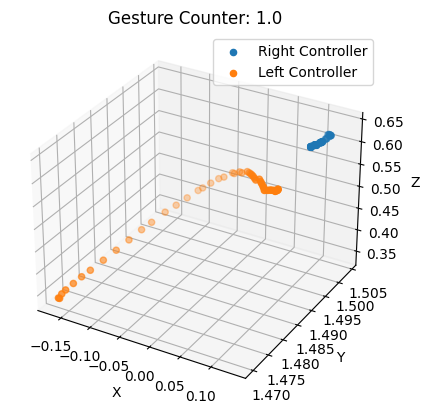

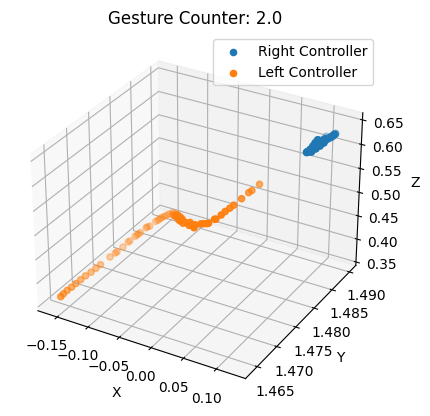

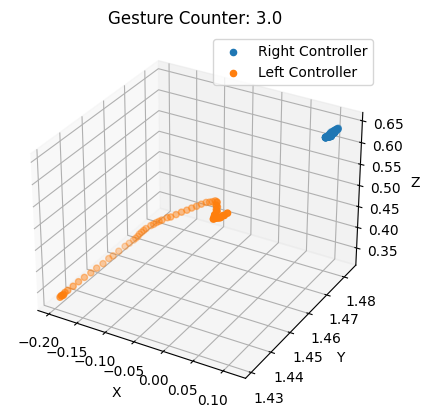

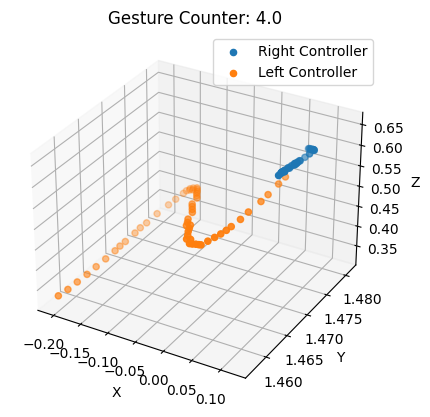

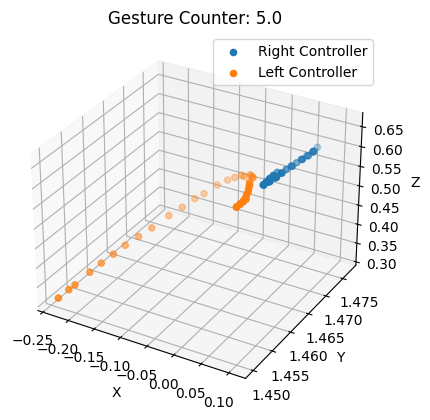

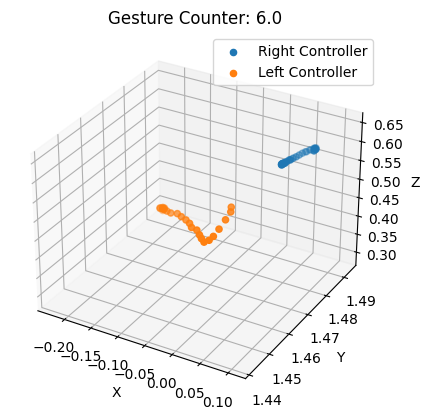

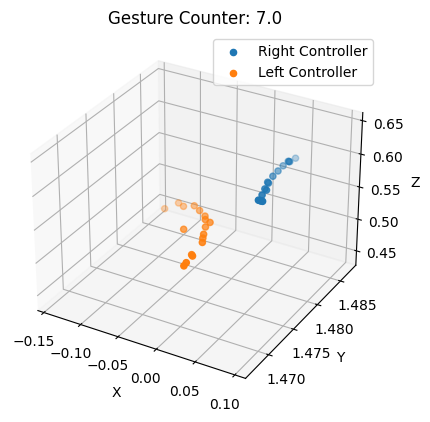

In [37]:
grouped_by_gesture = sub_1_1_pan_left_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()

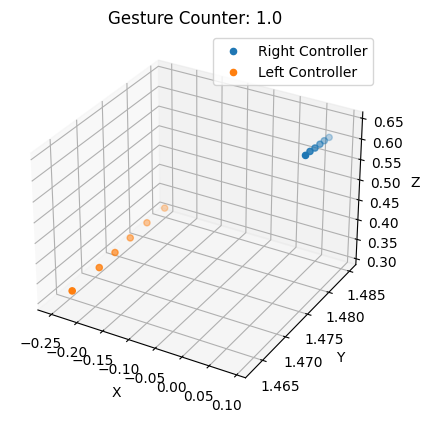

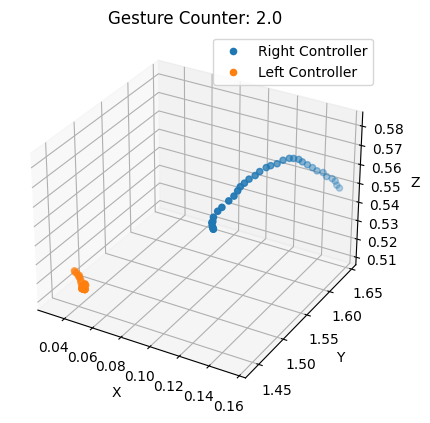

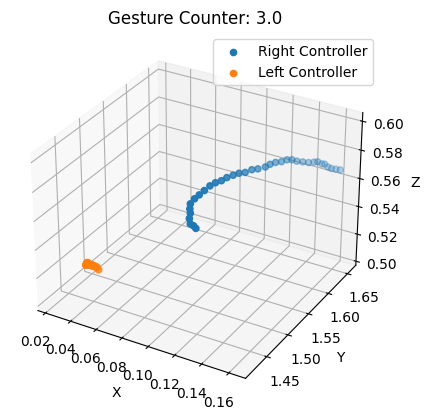

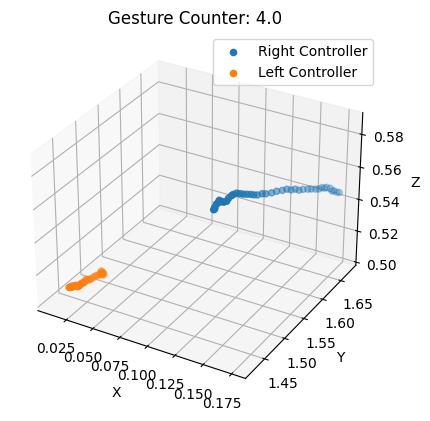

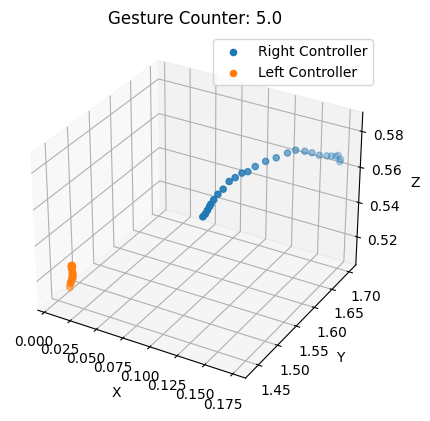

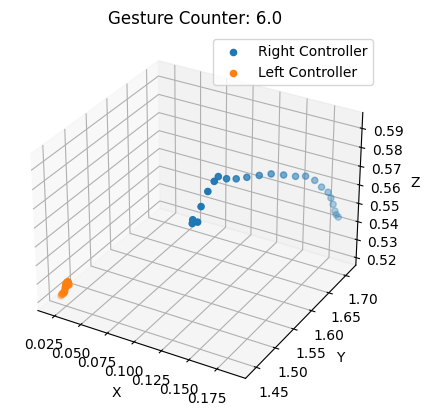

In [38]:
# importing sub 1 pan up data
sub_1_1_pan_up_DF = pd.read_csv("../Data/Sub1/Instructional/session_I_PanUp_subjID_1_04-14-23_02-30-52.csv")
sub_1_1_pan_up_DF.drop(sub_1_1_pan_up_DF[(sub_1_1_pan_up_DF['trigger_pull_amount_left'] == 0) & (sub_1_1_pan_up_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)

grouped_by_gesture = sub_1_1_pan_up_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()


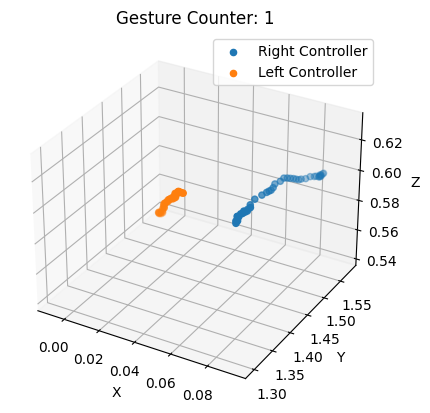

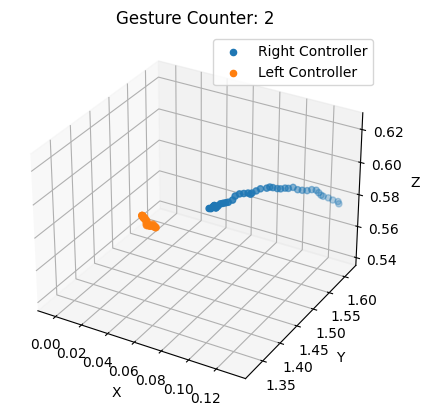

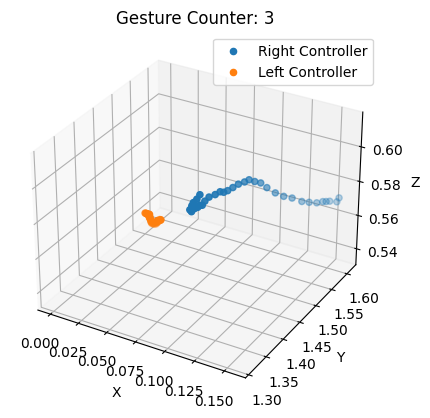

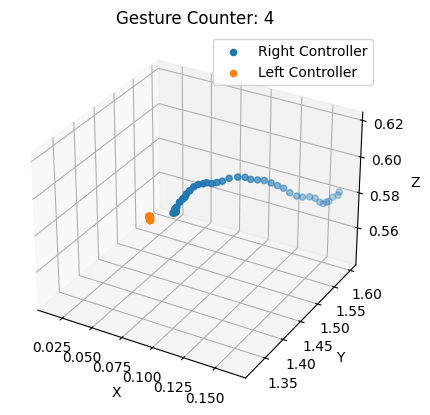

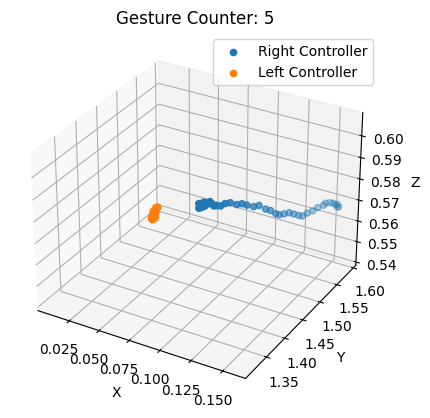

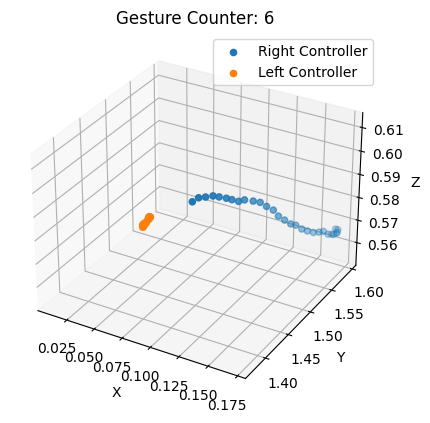

In [39]:
# importing sub 1 pan up data
sub_1_1_pan_down_DF = pd.read_csv("../Data/Sub1/Instructional/session_I_PanDown_subjID_1_04-14-23_02-31-00.csv")
sub_1_1_pan_down_DF.drop(sub_1_1_pan_down_DF[(sub_1_1_pan_down_DF['trigger_pull_amount_left'] == 0) & (sub_1_1_pan_down_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)

grouped_by_gesture = sub_1_1_pan_down_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()